In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#generate data
x1=np.random.multivariate_normal(mean=[1,2],cov=[[1,0],[2,1]],size=(500))
x2=np.random.multivariate_normal(mean=[1.5,3],cov=[[0.5,0],[2,0.5]],size=(500))
x=np.vstack((x1,x2)).T.astype(np.float32)
y=np.concatenate((np.zeros(500),np.ones(500))).astype(np.float32)

C:\Users\yutia\AppData\Local\Temp\ipykernel_13096\1596622742.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x1=np.random.multivariate_normal(mean=[1,2],cov=[[1,0],[2,1]],size=(500))
C:\Users\yutia\AppData\Local\Temp\ipykernel_13096\1596622742.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x2=np.random.multivariate_normal(mean=[1.5,3],cov=[[0.5,0],[2,0.5]],size=(500))


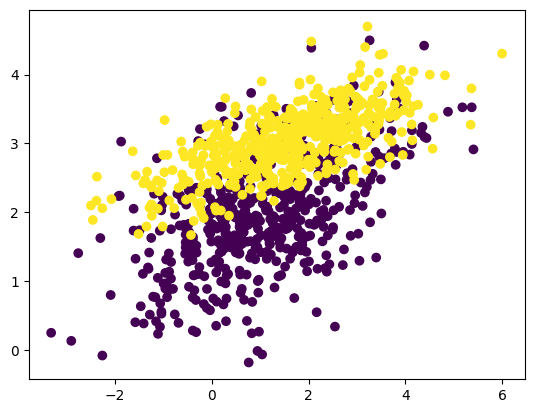

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x[0],x[1],c=y)

In [4]:
def loss(pred,real):
    return tf.reduce_mean(tf.square(real-pred))

In [5]:
learning_rate=0.05
input_dim = 2
output_dim = 1

x=tf.constant(x.T,dtype=tf.float32)
y=tf.constant(y.T,dtype=tf.float32)
print(x.shape)
W1 = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)),dtype=tf.float32)
b1 = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)),dtype=tf.float32)


(1000, 2)


In [6]:
def train(epochs):
    for _epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred=tf.matmul(x,W1)+b1
            loss_value=loss(y_pred,y)
            print(loss_value)
        gradient_weight,gradient_bias=tape.gradient(loss_value,[W1,b1])
        W1.assign_sub(gradient_weight*learning_rate)
        b1.assign_sub(gradient_bias*learning_rate)
        print("loss value is "+str(loss_value))


In [7]:
def predict(x_new):
    x_new=tf.constant(x_new,dtype=tf.float32)
    x_new=tf.reshape(x_new,[1,2])
    y_pred_new=tf.matmul(x_new,W1)+b1
    return y_pred_new

In [8]:
train(15)

tf.Tensor(6.8784227, shape=(), dtype=float32)
loss value is tf.Tensor(6.8784227, shape=(), dtype=float32)
tf.Tensor(0.69062996, shape=(), dtype=float32)
loss value is tf.Tensor(0.69062996, shape=(), dtype=float32)
tf.Tensor(0.5822975, shape=(), dtype=float32)
loss value is tf.Tensor(0.5822975, shape=(), dtype=float32)
tf.Tensor(0.5124699, shape=(), dtype=float32)
loss value is tf.Tensor(0.5124699, shape=(), dtype=float32)
tf.Tensor(0.45848966, shape=(), dtype=float32)
loss value is tf.Tensor(0.45848966, shape=(), dtype=float32)
tf.Tensor(0.4167074, shape=(), dtype=float32)
loss value is tf.Tensor(0.4167074, shape=(), dtype=float32)
tf.Tensor(0.38434634, shape=(), dtype=float32)
loss value is tf.Tensor(0.38434634, shape=(), dtype=float32)
tf.Tensor(0.35926208, shape=(), dtype=float32)
loss value is tf.Tensor(0.35926208, shape=(), dtype=float32)
tf.Tensor(0.33979893, shape=(), dtype=float32)
loss value is tf.Tensor(0.33979893, shape=(), dtype=float32)
tf.Tensor(0.32467803, shape=(), dtyp

In [11]:
predict([1,1])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.18821773]], dtype=float32)>